In [165]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [167]:
df.shape

(8425, 23)

In [168]:
df.duplicated().sum()

1663

There are duplicate values that needed to be droped, to avoid creation of biased models

In [169]:
df.drop_duplicates(inplace=True)

df.shape

(6762, 23)

In [170]:
# Check for null values

df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

Lots of columns with null values we need to fill them up.

I will check for datatypes before filling null values

In [171]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Solution to the first problem statement, to predict rainfalling tomorrow

In [172]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [173]:
# convert object values to numerical for analysis

# converting string values into numbers for model to use
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df.dtypes[col] == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
print(df)

      Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4     22.9       0.6          NaN       NaN   
1        1         1      7.4     25.1       0.0          NaN       NaN   
2        2         1     12.9     25.7       0.0          NaN       NaN   
3        3         1      9.2     28.0       0.0          NaN       NaN   
4        4         1     17.5     32.3       1.0          NaN       NaN   
...    ...       ...      ...      ...       ...          ...       ...   
8420  2999         9      2.8     23.4       0.0          NaN       NaN   
8421  3000         9      3.6     25.3       0.0          NaN       NaN   
8422  3001         9      5.4     26.9       0.0          NaN       NaN   
8423  3002         9      7.8     27.0       0.0          NaN       NaN   
8424  3003         9     14.9      NaN       0.0          NaN       NaN   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0              13   

In [174]:
df.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [175]:
df['RainTomorrow'].unique()

array([0, 1, 2])

In [176]:
df['Sunshine'].isna().value_counts()

False    3526
True     3236
Name: Sunshine, dtype: int64

I will drop all columns with NaN, analyse and build a model to check performance.

In [177]:
df.dropna(inplace=True)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,99,3,19.8,27.1,24.4,8.6,9.0,2,35.0,12,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,100,3,18.7,25.6,6.8,3.8,3.4,0,33.0,12,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,101,3,16.5,25.5,16.8,2.8,6.1,15,19.0,15,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,102,3,18.5,26.9,0.0,3.2,11.0,1,30.0,12,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,103,3,18.2,28.2,0.0,6.8,9.0,5,50.0,6,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1406,4,25.2,34.5,3.0,4.0,9.2,5,39.0,3,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,1407,4,26.2,33.3,0.0,6.0,5.9,3,54.0,1,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,1408,4,24.9,32.8,20.4,6.2,8.7,14,37.0,5,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,1409,4,25.5,33.1,0.0,4.8,7.1,10,37.0,0,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


In [178]:
df['RainTomorrow'].unique()

array([1, 0, 2])

In [179]:
# deleting row with nan values on RainTomorrow column
df = df[df['RainTomorrow'] != 2]

In [180]:
df.shape

(3200, 23)

In [181]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [182]:
x = df.drop('RainTomorrow', axis=1)

y = df['RainTomorrow']

In [183]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif


# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k='all')
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(23,'score'))

     feature_name        score
14    Humidity3pm  1111.781209
6        Sunshine  1041.705197
18       Cloud3pm   750.558606
17       Cloud9am   497.258292
21      RainToday   448.482548
13    Humidity9am   427.180635
4        Rainfall   300.733647
20        Temp3pm   215.323434
3         MaxTemp   138.029790
8   WindGustSpeed   117.355865
15    Pressure9am   100.810745
5     Evaporation    62.822043
16    Pressure3pm    55.181503
7     WindGustDir    27.067206
12   WindSpeed3pm    23.218281
19        Temp9am    18.092345
0            Date    17.975295
9      WindDir9am    15.842289
2         MinTemp    15.292657
11   WindSpeed9am    12.175235
10     WindDir3pm     8.253779
1        Location     5.905202


I will further check with regplot to view relationship between features and label



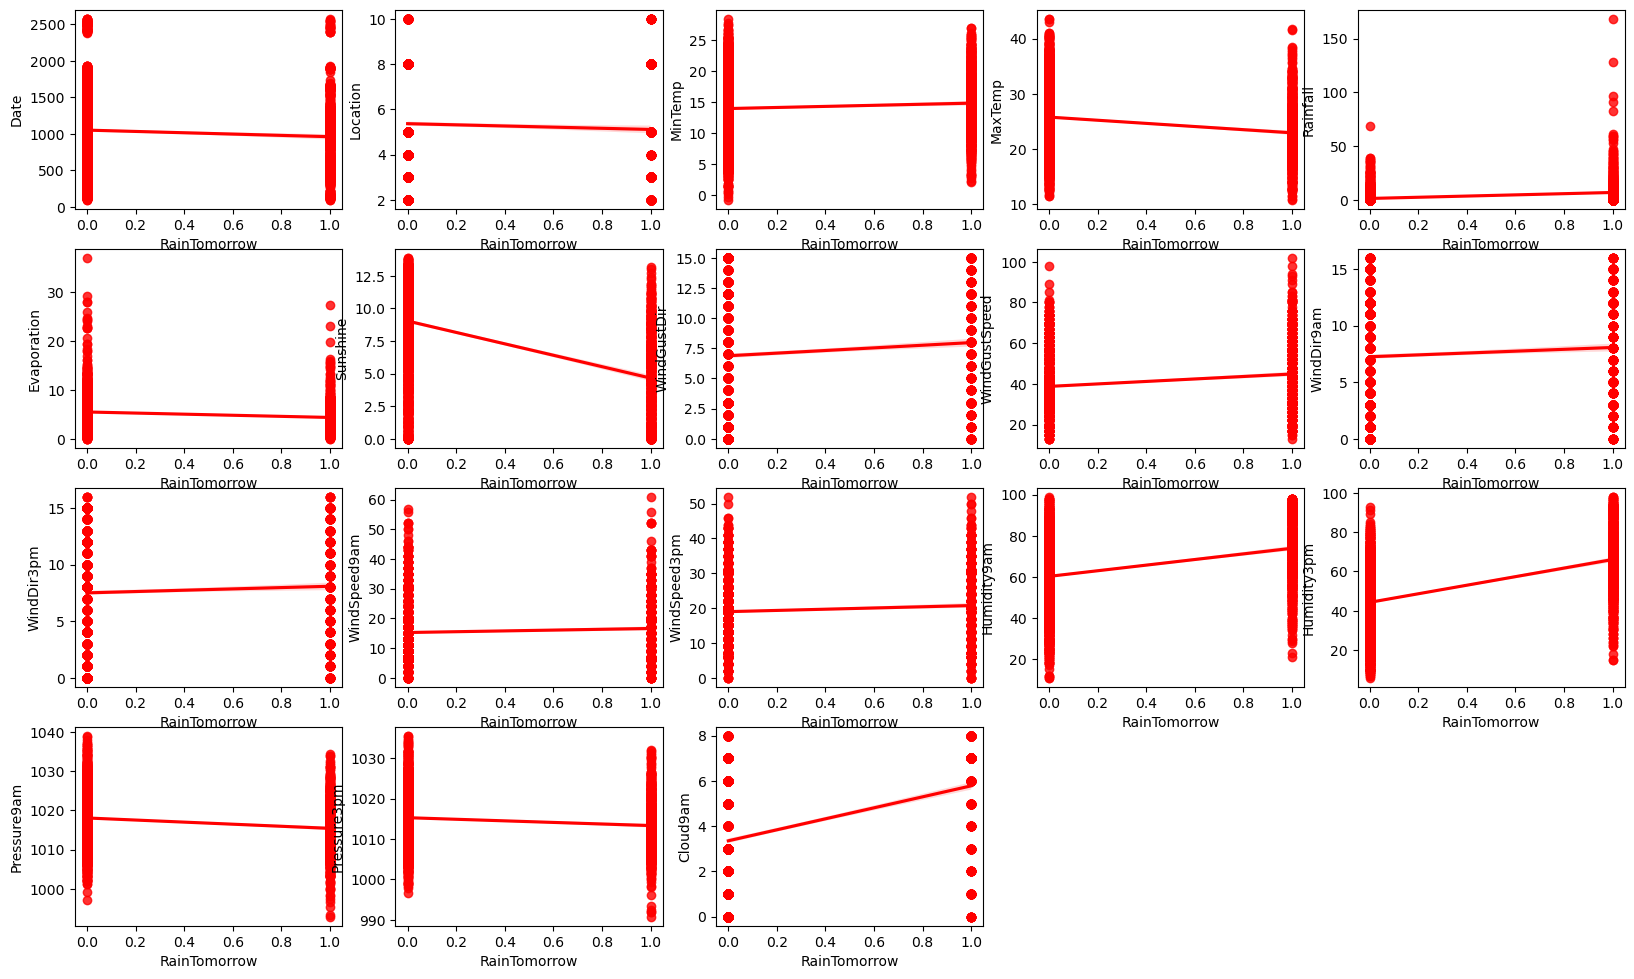

In [184]:
# Plot to check correlationship between features and label

plt.figure(figsize=(20,15))

p = 1

for i in df:
    if p <= 18:
        plt.subplot(5,5,p)
        snb.regplot(x='RainTomorrow', y=i, data=df, color='r')
        plt.xlabel='RainTomorrow'
        plt.ylabel=i
        
    p += 1

plt.show()

# I will drop column from date downward in the SelectKBest report, because they are not contributing significantly to the label

In [185]:
df2 = df.drop(columns=['Date','MinTemp','WindDir3pm','WindDir9am','Location','WindDir9am'])

df2

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,27.1,24.4,8.6,9.0,2,35.0,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,25.6,6.8,3.8,3.4,0,33.0,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,25.5,16.8,2.8,6.1,15,19.0,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,26.9,0.0,3.2,11.0,1,30.0,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,28.2,0.0,6.8,9.0,5,50.0,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,34.5,3.0,4.0,9.2,5,39.0,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,33.3,0.0,6.0,5.9,3,54.0,13.0,13.0,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,32.8,20.4,6.2,8.7,14,37.0,13.0,20.0,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,33.1,0.0,4.8,7.1,10,37.0,20.0,13.0,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


In [186]:
df2.describe()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,25.125688,2.503156,5.212281,8.032938,7.125625,40.128750,15.539375,19.378438,63.391875,49.298437,1017.426625,1014.844344,3.910938,4.034688,19.447063,23.637844,0.231250,0.229687
std,5.887030,7.976812,3.387724,3.717915,5.009759,13.618903,9.297101,8.680727,16.740845,18.023204,6.357782,6.295679,2.786092,2.659548,5.429817,5.766288,0.421698,0.420698
min,10.800000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,0.000000,0.000000
25%,20.775000,0.000000,2.800000,5.700000,3.000000,30.000000,9.000000,13.000000,52.000000,37.000000,1013.100000,1010.300000,1.000000,1.000000,15.300000,19.400000,0.000000,0.000000
50%,24.500000,0.000000,4.600000,9.100000,8.000000,39.000000,13.000000,19.000000,64.000000,49.000000,1017.300000,1014.800000,4.000000,4.000000,19.200000,23.000000,0.000000,0.000000
75%,29.500000,0.600000,7.000000,10.800000,12.000000,48.000000,22.000000,26.000000,75.000000,61.000000,1021.600000,1018.900000,7.000000,7.000000,23.600000,27.725000,0.000000,0.000000
max,43.600000,168.400000,37.000000,13.900000,15.000000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,1.000000,1.000000


I observe outliers in some columns due to the difference between mean and std, also the gap between 75% percentile and max is too much

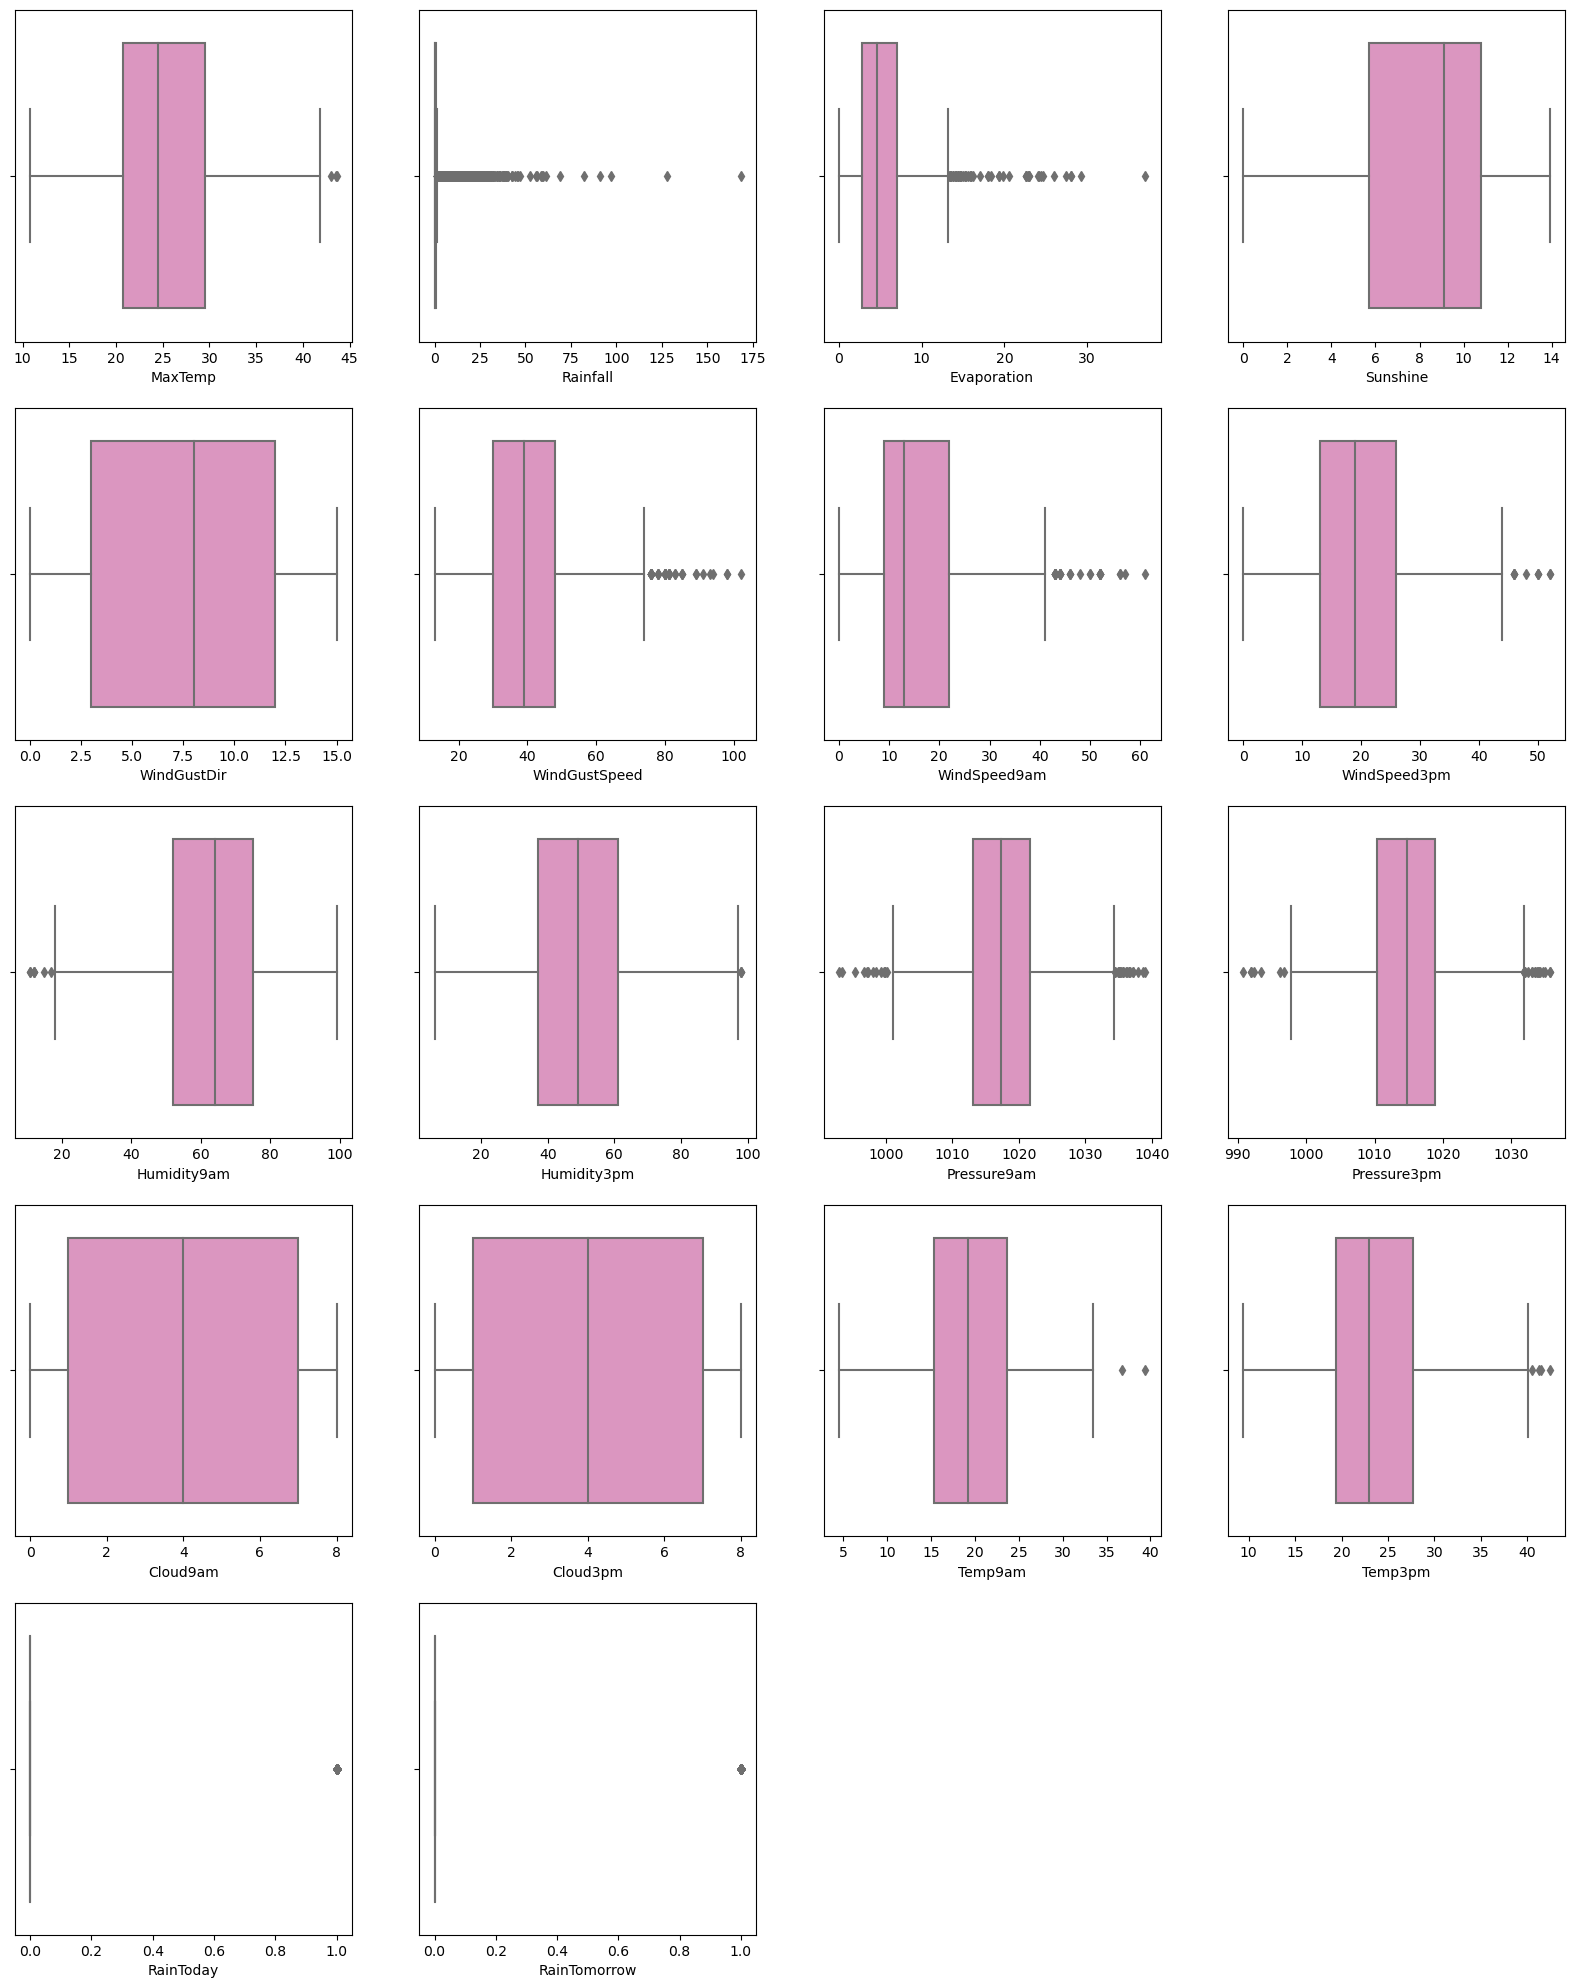

In [187]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df2:
    if p<=19:
        plt.subplot(5,4,p)
        snb.boxplot(df2[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

In [188]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df2[['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(out_features))

z

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
907,2.745491,1.000155,0.376649,0.157130,0.302045,1.171458,0.593859,0.231780,0.485434,0.470244,0.409713
908,0.538751,0.416947,0.523527,0.157130,0.734896,1.290945,2.258640,0.514942,0.834934,0.286047,0.474876
909,1.792581,0.712177,1.551671,1.026219,1.195759,1.231201,0.871322,0.640791,0.834934,0.286047,0.149540
910,0.313853,0.594085,0.743844,0.918642,0.071614,0.275305,0.593859,0.231780,0.278910,0.709700,0.479093
911,0.313853,0.468741,0.724933,0.273179,1.799850,0.215562,1.037800,0.177232,0.324772,0.838638,0.392369
...,...,...,...,...,...,...,...,...,...,...,...
8381,0.062296,0.357901,0.082894,0.488333,0.302045,0.155818,0.183039,0.963792,1.103206,1.870141,1.693235
8382,0.313853,0.232558,1.018688,0.273179,0.734896,0.155818,2.425118,1.105373,1.277956,1.980659,0.270954
8383,2.243959,0.291604,0.229772,0.273179,0.071614,0.514279,0.316395,1.184029,1.373274,1.851722,1.450407
8384,0.313853,0.121718,0.229772,0.479862,0.734896,0.083155,0.482873,0.995255,1.262070,1.685944,1.363682


In [189]:
# Using Threshold of 3 to check for outliers

np.where(z>3)

(array([  26,   40,   42,   69,   91,  228,  259,  260,  318,  319,  410,
         411,  464,  465,  466,  528,  529,  547,  559,  565,  569,  576,
         576,  579,  583,  586,  590,  594,  595,  598,  599,  601,  604,
         608,  611,  615,  618,  622,  625,  629,  632,  636,  643,  656,
         656,  658,  676,  692,  694,  694,  733,  734,  743,  744,  763,
         763,  775,  782,  797,  798,  799,  803,  803,  855,  899,  903,
         904,  904,  921,  937,  956,  956,  960,  972,  972,  972,  973,
         977,  995,  999, 1002, 1002, 1020, 1027, 1039, 1043, 1055, 1066,
        1080, 1081, 1131, 1131, 1132, 1142, 1143, 1155, 1155, 1158, 1168,
        1169, 1169, 1170, 1170, 1170, 1170, 1178, 1195, 1196, 1204, 1211,
        1217, 1219, 1220, 1220, 1224, 1227, 1251, 1259, 1270, 1444, 1461,
        1497, 1513, 1535, 1536, 1543, 1544, 1554, 1570, 1632, 1691, 1774,
        1775, 1801, 1801, 1802, 1819, 1834, 1944, 1995, 2002, 2019, 2019,
        2020, 2020, 2021, 2111, 2132, 

In [190]:
df3 = df2[(z<3).all(axis=1)]

df3

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,27.1,24.4,8.6,9.0,2,35.0,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,25.6,6.8,3.8,3.4,0,33.0,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,25.5,16.8,2.8,6.1,15,19.0,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,26.9,0.0,3.2,11.0,1,30.0,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,28.2,0.0,6.8,9.0,5,50.0,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,34.5,3.0,4.0,9.2,5,39.0,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,33.3,0.0,6.0,5.9,3,54.0,13.0,13.0,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,32.8,20.4,6.2,8.7,14,37.0,13.0,20.0,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,33.1,0.0,4.8,7.1,10,37.0,20.0,13.0,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


In [191]:
print('the shape of old data: ',df2.shape[0])
print('the shape of new data: ',df3.shape[0])

print('percentage data loss after removing outliers ', ((df2.shape[0] - df3.shape[0])/df2.shape[0])* 100)

the shape of old data:  3200
the shape of new data:  3044
percentage data loss after removing outliers  4.875


Percentage loss is not much

<function matplotlib.pyplot.show(close=None, block=None)>

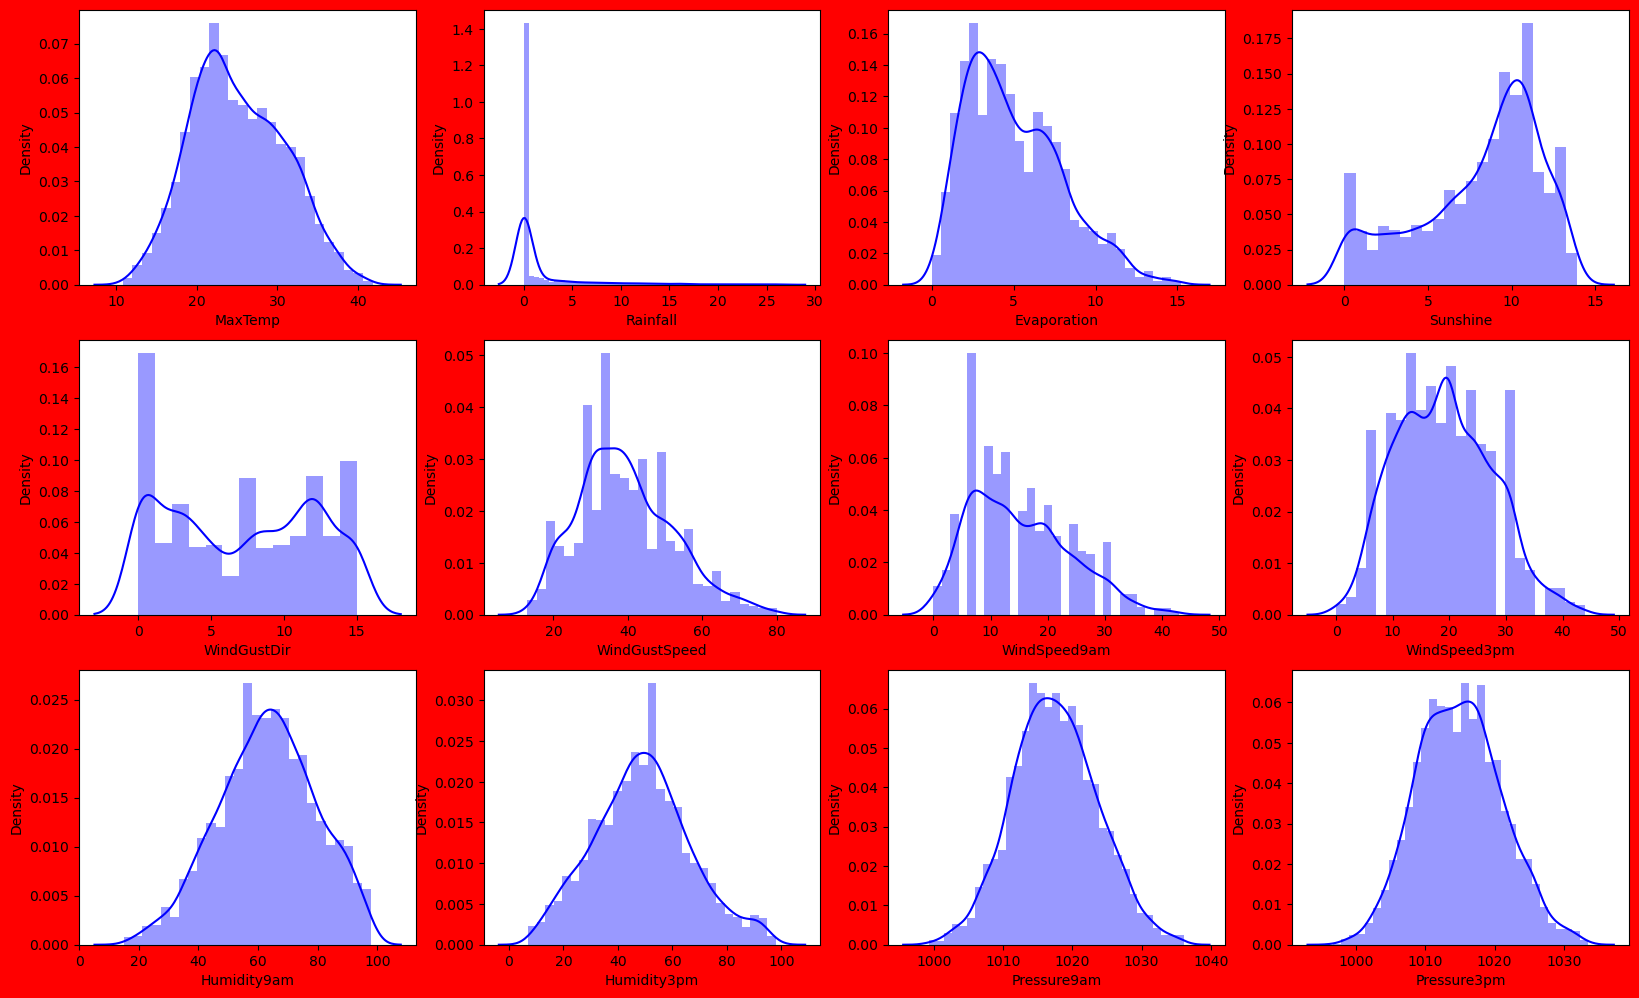

In [192]:
# Checking how data is distributed across columns and skewness

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df3:
    if p<= 12:
        ax = plt.subplot(6,4,p)
        snb.distplot(df3[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [193]:
df3.skew()

MaxTemp          0.222763
Rainfall         3.256418
Evaporation      0.678074
Sunshine        -0.721305
WindGustDir      0.021664
WindGustSpeed    0.509068
WindSpeed9am     0.550996
WindSpeed3pm     0.246198
Humidity9am     -0.150301
Humidity3pm      0.184714
Pressure9am      0.111238
Pressure3pm      0.164105
Cloud9am         0.019618
Cloud3pm        -0.011719
Temp9am         -0.004601
Temp3pm          0.237058
RainToday        1.375075
RainTomorrow     1.386866
dtype: float64

In [194]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column aside the label
pt = PowerTransformer(method='yeo-johnson')

for col in df3:
    if col != 'RainTomorrow':
        if (df3[col].skew() < -0.5) or (df3[col].skew() > 0.5):
            df3[col] = pt.fit_transform(df3[col].values.reshape(-1, 1))        
df3.skew()

MaxTemp          0.222763
Rainfall         1.130304
Evaporation     -0.030698
Sunshine        -0.415153
WindGustDir      0.021664
WindGustSpeed   -0.012889
WindSpeed9am    -0.054366
WindSpeed3pm     0.246198
Humidity9am     -0.150301
Humidity3pm      0.184714
Pressure9am      0.111238
Pressure3pm      0.164105
Cloud9am         0.019618
Cloud3pm        -0.011719
Temp9am         -0.004601
Temp3pm          0.237058
RainToday        1.375075
RainTomorrow     1.386866
dtype: float64

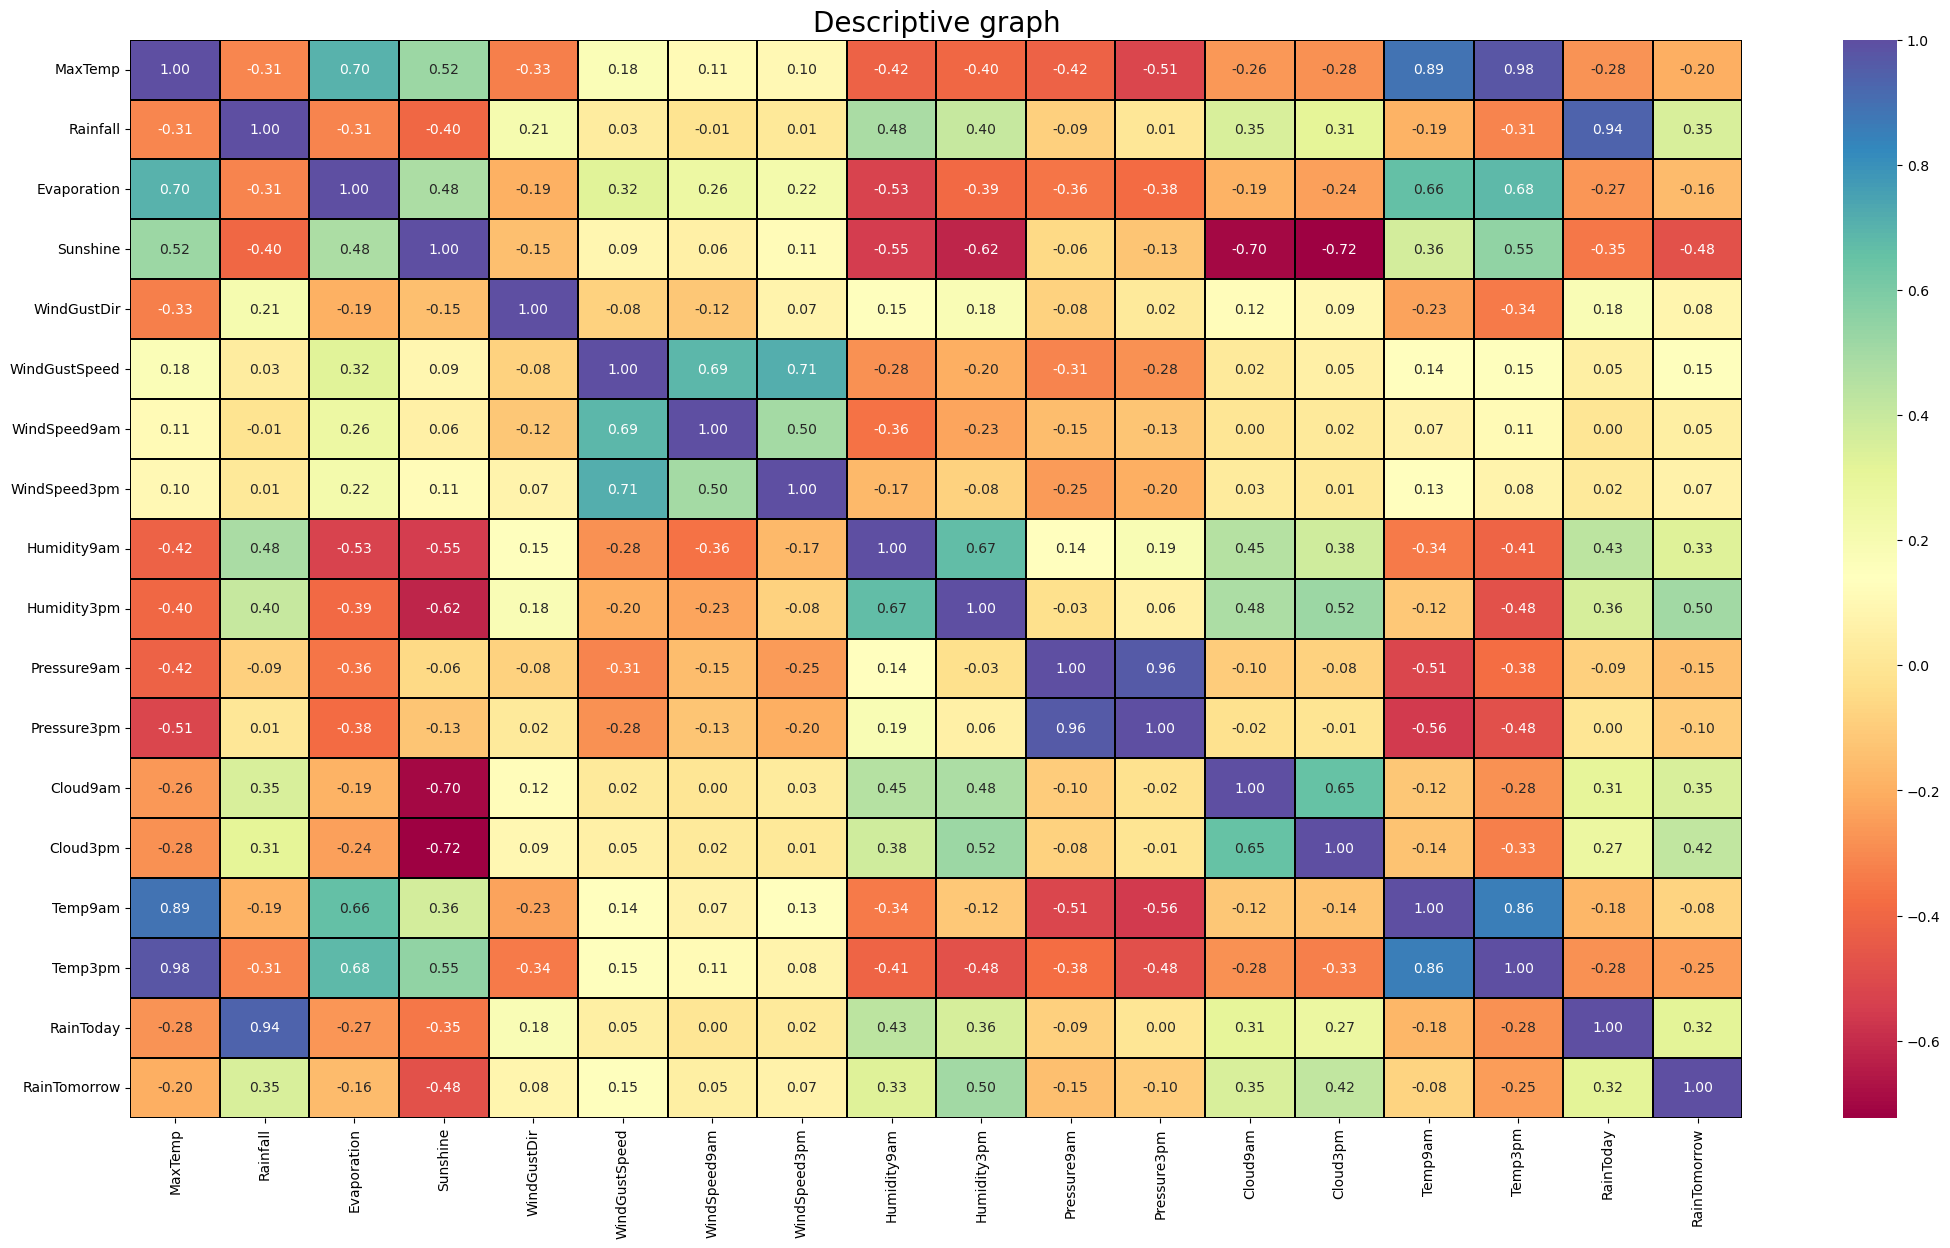

In [195]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df3.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

The multicolinearity between pressure9am and pressure3pm, temp9am and temp3pm, maxTemp,temp9am and temp3pm, RainToday and Rainfall.

I will drop temp9am and maxTemp because temp3pm has stronger relationship with label i.e RainTomorrow

I will drop Pressure3pm because Pressure9am has stronger relationship with label i.e RainTomorrow

I will drop RainToday because it has lesser contribution compared to Rainfall

In [196]:
df3.drop(columns=['Temp9am','MaxTemp','Pressure3pm','RainToday'], inplace=True)

df3

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainTomorrow
907,1.923727,1.186846,0.167149,2,-0.247954,0.341530,22.0,83.0,60.0,1018.9,6.0,6.0,26.0,1
908,1.878113,-0.275824,-1.329832,0,-0.419567,0.341530,13.0,85.0,90.0,1020.7,4.0,7.0,20.9,1
909,1.918513,-0.704422,-0.668925,15,-1.866641,-1.073674,9.0,84.0,65.0,1021.5,5.0,7.0,24.5,0
910,-0.619333,-0.524459,0.806996,1,-0.690124,-0.912681,20.0,68.0,60.0,1018.9,2.0,5.0,26.4,0
911,-0.619333,0.716516,0.167149,5,0.871121,-0.104199,35.0,67.0,68.0,1016.3,1.0,1.0,25.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1.747209,-0.197814,0.228954,5,0.077031,-0.350509,22.0,66.0,46.0,1011.3,7.0,7.0,33.4,0
8382,-0.619333,0.482716,-0.722110,3,1.131241,-0.104199,13.0,66.0,93.0,1010.4,4.0,8.0,25.2,1
8383,1.921649,0.542855,0.075387,14,-0.082602,-0.104199,20.0,72.0,55.0,1009.9,4.0,6.0,32.0,0
8384,-0.619333,0.093963,-0.393935,10,-0.082602,0.644739,13.0,62.0,58.0,1011.1,7.0,7.0,31.5,0


In [197]:
#Seperate the label from feature

x = df3.drop('RainTomorrow', axis =1)
y = df3['RainTomorrow']

In [201]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

x

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm
0,1.923727,1.186846,0.167149,-1.023464,-0.247954,0.341530,0.346504,1.209327,0.620069,0.218023,0.773615,0.767547,0.414324
1,1.878113,-0.275824,-1.329832,-1.422417,-0.419567,0.341530,-0.724196,1.331315,2.311774,0.510930,0.052254,1.145669,-0.480618
2,1.918513,-0.704422,-0.668925,1.569731,-1.866641,-1.073674,-1.200063,1.270321,0.902020,0.641111,0.412934,1.145669,0.151105
3,-0.619333,-0.524459,0.806996,-1.222940,-0.690124,-0.912681,0.108571,0.294412,0.620069,0.218023,-0.669107,0.389426,0.484515
4,-0.619333,0.716516,0.167149,-0.425034,0.871121,-0.104199,1.893072,0.233418,1.071191,-0.205065,-1.029788,-1.123061,0.396776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,1.747209,-0.197814,0.228954,-0.425034,0.077031,-0.350509,0.346504,0.172423,-0.169393,-1.018695,1.134295,1.145669,1.712866
3040,-0.619333,0.482716,-0.722110,-0.823987,1.131241,-0.104199,-0.724196,0.172423,2.480945,-1.165148,0.052254,1.523791,0.273941
3041,1.921649,0.542855,0.075387,1.370254,-0.082602,-0.104199,0.108571,0.538389,0.338119,-1.246511,0.052254,0.767547,1.467196
3042,-0.619333,0.093963,-0.393935,0.572348,-0.082602,0.644739,-0.724196,-0.071554,0.507289,-1.051240,1.134295,1.145669,1.379457


In [202]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.499392,Rainfall
1,2.531099,Evaporation
2,3.967854,Sunshine
3,1.297902,WindGustDir
4,3.304241,WindGustSpeed
5,2.139264,WindSpeed9am
6,2.222718,WindSpeed3pm
7,2.793163,Humidity9am
8,2.581464,Humidity3pm
9,1.605491,Pressure9am


VIF Values are within the threshold of 5

In [203]:
# Checking for imbalance in the label column

y.value_counts()

0    2389
1     655
Name: RainTomorrow, dtype: int64

The difference is too much, therefore I will balance the dataset using SMOTE method

In [204]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)

In [205]:
y.value_counts()

1    2389
0    2389
Name: RainTomorrow, dtype: int64

In [206]:
#Classification problems algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.9281729428172942  at random state :  92


In [207]:
#creating train test split

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=maxRS)

In [208]:
#RandomForestClassifier
#checking accuracy for random forest classifier 

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9267782426778243
[[637  67]
 [ 38 692]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       704
           1       0.91      0.95      0.93       730

    accuracy                           0.93      1434
   macro avg       0.93      0.93      0.93      1434
weighted avg       0.93      0.93      0.93      1434



In [209]:
#LogisticsRegression
#checking accuracy for LogisticsRegression  

LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8417015341701534
[[600 104]
 [123 607]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       704
           1       0.85      0.83      0.84       730

    accuracy                           0.84      1434
   macro avg       0.84      0.84      0.84      1434
weighted avg       0.84      0.84      0.84      1434



In [210]:
#AdaBoostClassifier
#checking accuracy for AdaboostClassifier 

AD = AdaBoostClassifier()
AD.fit(x_train, y_train)

predAD = AD.predict(x_test)
print(accuracy_score(y_test, predAD))
print(confusion_matrix(y_test, predAD))
print(classification_report(y_test, predAD))

0.8465829846582985
[[589 115]
 [105 625]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       704
           1       0.84      0.86      0.85       730

    accuracy                           0.85      1434
   macro avg       0.85      0.85      0.85      1434
weighted avg       0.85      0.85      0.85      1434



In [211]:
#ExtraTreeClassifier
#checking accuracy for ExtraTreeClassifier 

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9407252440725244
[[646  58]
 [ 27 703]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       704
           1       0.92      0.96      0.94       730

    accuracy                           0.94      1434
   macro avg       0.94      0.94      0.94      1434
weighted avg       0.94      0.94      0.94      1434



In [212]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and RandomForestClassifier is ', accuracy_score(y_test, predRFC) - score.mean())

[0.81485356 0.82008368 0.92573222 0.9434555  0.93298429]
0.8874218493285724
Difference between accuracy score and RandomForestClassifier is  0.039356393349251895


In [213]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predLR) - score.mean())

[0.72384937 0.74476987 0.83263598 0.84502618 0.85549738]
0.8003557580669893
Difference between accuracy score and LogisticsRegression is  0.041345776103164034


In [214]:
score = cross_val_score(AD,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and AdaboostClassifier is ', accuracy_score(y_test, predAD) - score.mean())

[0.70920502 0.75104603 0.84937238 0.88062827 0.84816754]
0.8076838484961335
Difference between accuracy score and AdaboostClassifier is  0.038899136162165004


In [215]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and ExtraTreeClassifier is ', accuracy_score(y_test, predET) - score.mean())

[0.85564854 0.82845188 0.93723849 0.94973822 0.9382199 ]
0.9018594054634275
Difference between accuracy score and ExtraTreeClassifier is  0.03886583860909698


ExtraTreeClassifier is the best performing model and also has lowest difference

In [216]:
#Hyper parameter Tunning 
#Type of cross validation method to get best values for model parameters IN THIS CASE ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

parameters = { 'criterion' :['gini','entropy'],
             'random_state' : [10,50,1000],
             'max_depth' : [0,10,20],
             'n_jobs' : [-2,-1,1],
             'n_estimators': [50,100,200,300]}

GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [217]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [218]:
final_model = ExtraTreesClassifier(criterion = 'gini', random_state=50, max_depth = 20, n_estimators = 300, n_jobs= -2)

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print(accuracy * 100)

94.21199442119944


We have better performing model after hyperparameter tuning

In [219]:
# Saving the model
# Using .pkl

import joblib
joblib.dump(final_model,'RainTomorrow.pkl')

['RainTomorrow.pkl']

In [220]:
# Lets load save model and get prediction

model = joblib.load('RainTomorrow.pkl')

In [221]:
# Testing the loaded model
prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 0, 0])

In [222]:
a = np.array(y_test)
df_test = pd.DataFrame()

df_test['predicted'] = prediction
df_test['original'] = a

df_test

,predicted,original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1429,1,1
1430,0,0
1431,0,0
1432,0,0


# Solution to b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Check for best performing features 

In [223]:
x = df.drop('Rainfall', axis=1)

y = df['Rainfall']

In [224]:
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(23,'score'))

     feature_name        score
14    Pressure9am  1111.781209
6     WindGustDir  1041.705197
18        Temp9am   750.558606
17       Cloud3pm   497.258292
21   RainTomorrow   448.482548
13    Humidity3pm   427.180635
4     Evaporation   300.733647
20      RainToday   215.323434
3         MaxTemp   138.029790
8      WindDir9am   117.355865
15    Pressure3pm   100.810745
5        Sunshine    62.822043
16       Cloud9am    55.181503
7   WindGustSpeed    27.067206
12    Humidity9am    23.218281
19        Temp3pm    18.092345
0            Date    17.975295
9      WindDir3pm    15.842289
2         MinTemp    15.292657
11   WindSpeed3pm    12.175235
10   WindSpeed9am     8.253779
1        Location     5.905202


Futher chect for relatioship using regplot

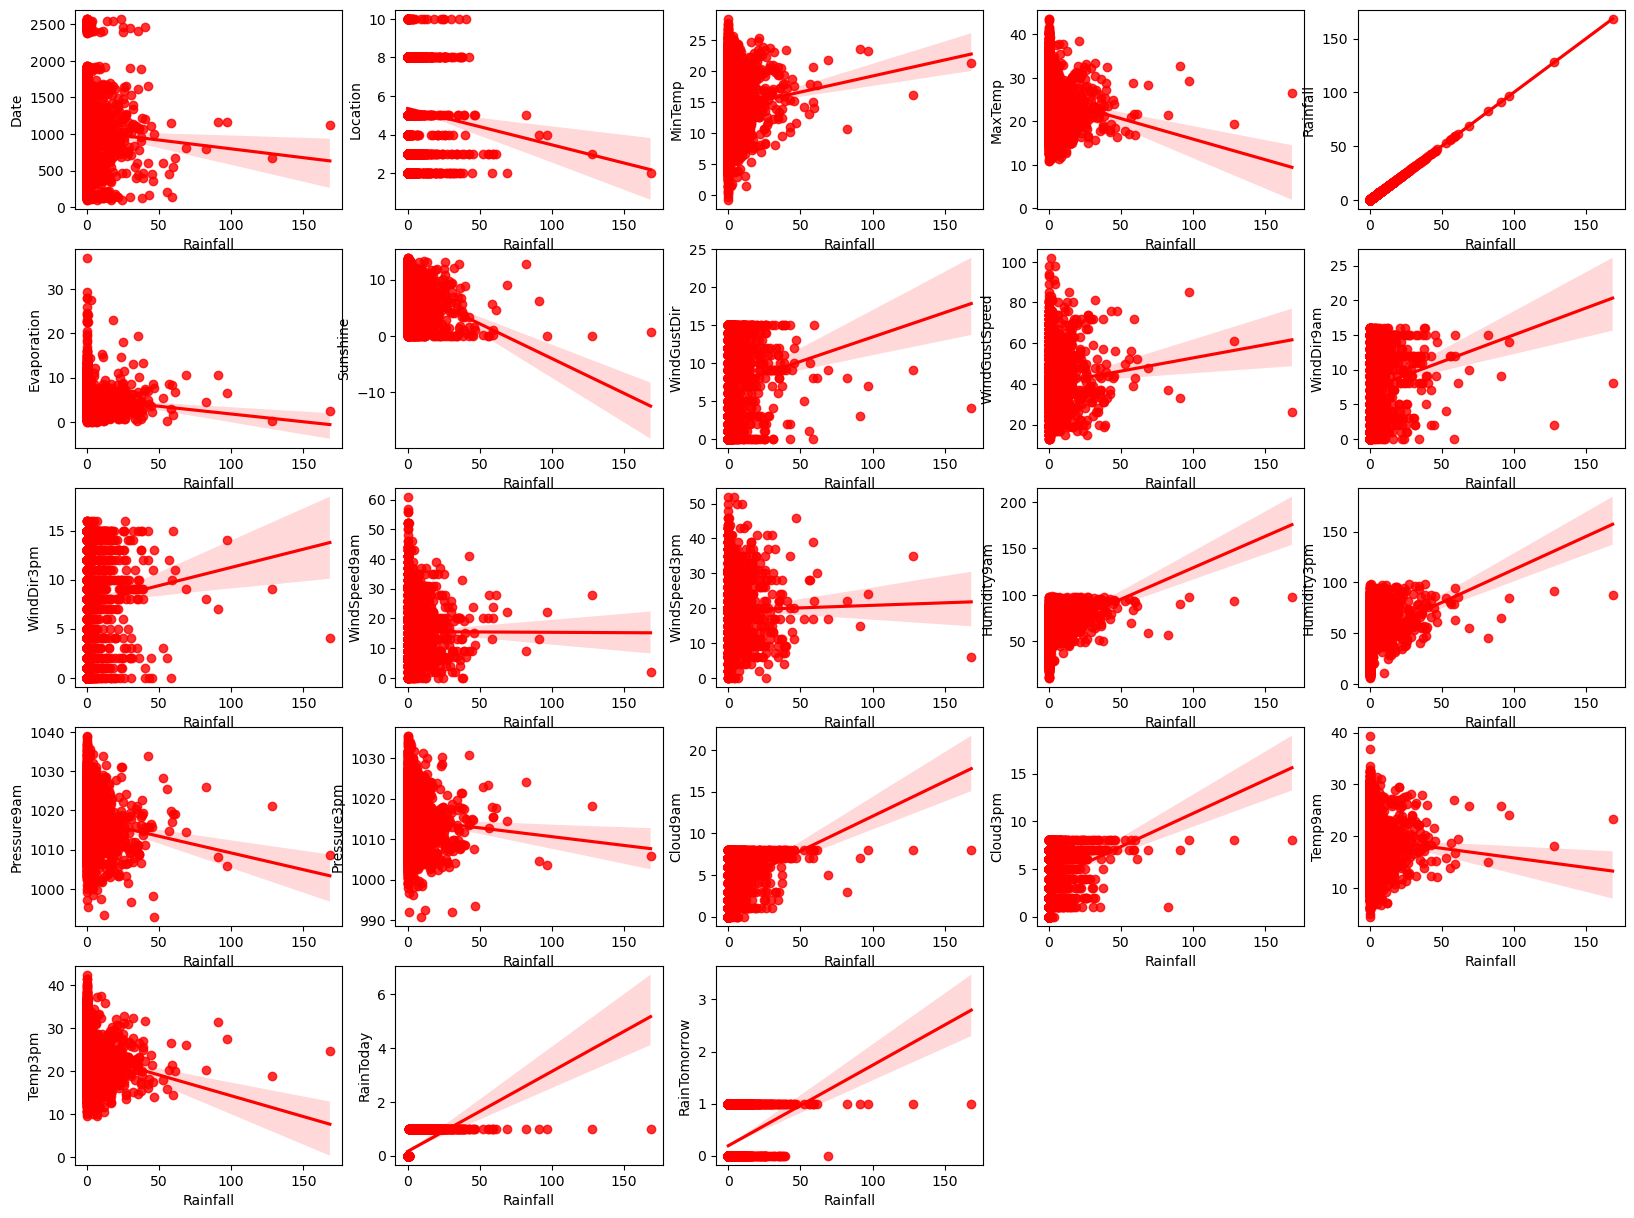

In [226]:
# Plot to check correlationship between features and label

plt.figure(figsize=(20,15))

p = 1

for i in df:
    if p <= 23:
        plt.subplot(5,5,p)
        snb.regplot(x='Rainfall', y=i, data=df, color='r')
        plt.xlabel='Rainfall'
        plt.ylabel=i
        
    p += 1

plt.show()

I will be droping columns from WindGustSpeed downward

In [252]:
# df4 = df.drop(columns=['Date','MinTemp','WindDir3pm','WindSpeed3pm','WindSpeed9am','Location'])
df4 = df.drop(columns=['WindSpeed9am','Location'])


df4

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,99,19.8,27.1,24.4,8.6,9.0,2,35.0,12,2,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,100,18.7,25.6,6.8,3.8,3.4,0,33.0,12,8,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,101,16.5,25.5,16.8,2.8,6.1,15,19.0,15,2,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,102,18.5,26.9,0.0,3.2,11.0,1,30.0,12,1,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,103,18.2,28.2,0.0,6.8,9.0,5,50.0,6,4,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1406,25.2,34.5,3.0,4.0,9.2,5,39.0,3,5,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,1407,26.2,33.3,0.0,6.0,5.9,3,54.0,1,0,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,1408,24.9,32.8,20.4,6.2,8.7,14,37.0,5,7,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,1409,25.5,33.1,0.0,4.8,7.1,10,37.0,0,15,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


In [253]:
df4.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,...,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,1032.086562,14.214062,25.125688,2.503156,5.212281,8.032938,7.125625,40.128750,7.435313,7.632500,...,63.391875,49.298437,1017.426625,1014.844344,3.910938,4.034688,19.447063,23.637844,0.231250,0.229687
std,507.541106,5.304250,5.887030,7.976812,3.387724,3.717915,5.009759,13.618903,4.911108,4.834485,...,16.740845,18.023204,6.357782,6.295679,2.786092,2.659548,5.429817,5.766288,0.421698,0.420698
min,99.000000,-0.700000,10.800000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,...,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,0.000000,0.000000
25%,632.000000,10.300000,20.775000,0.000000,2.800000,5.700000,3.000000,30.000000,3.000000,3.000000,...,52.000000,37.000000,1013.100000,1010.300000,1.000000,1.000000,15.300000,19.400000,0.000000,0.000000
50%,1023.000000,14.200000,24.500000,0.000000,4.600000,9.100000,8.000000,39.000000,8.000000,8.000000,...,64.000000,49.000000,1017.300000,1014.800000,4.000000,4.000000,19.200000,23.000000,0.000000,0.000000
75%,1327.000000,18.200000,29.500000,0.600000,7.000000,10.800000,12.000000,48.000000,12.000000,12.000000,...,75.000000,61.000000,1021.600000,1018.900000,7.000000,7.000000,23.600000,27.725000,0.000000,0.000000
max,2578.000000,28.500000,43.600000,168.400000,37.000000,13.900000,15.000000,102.000000,16.000000,16.000000,...,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,1.000000,1.000000


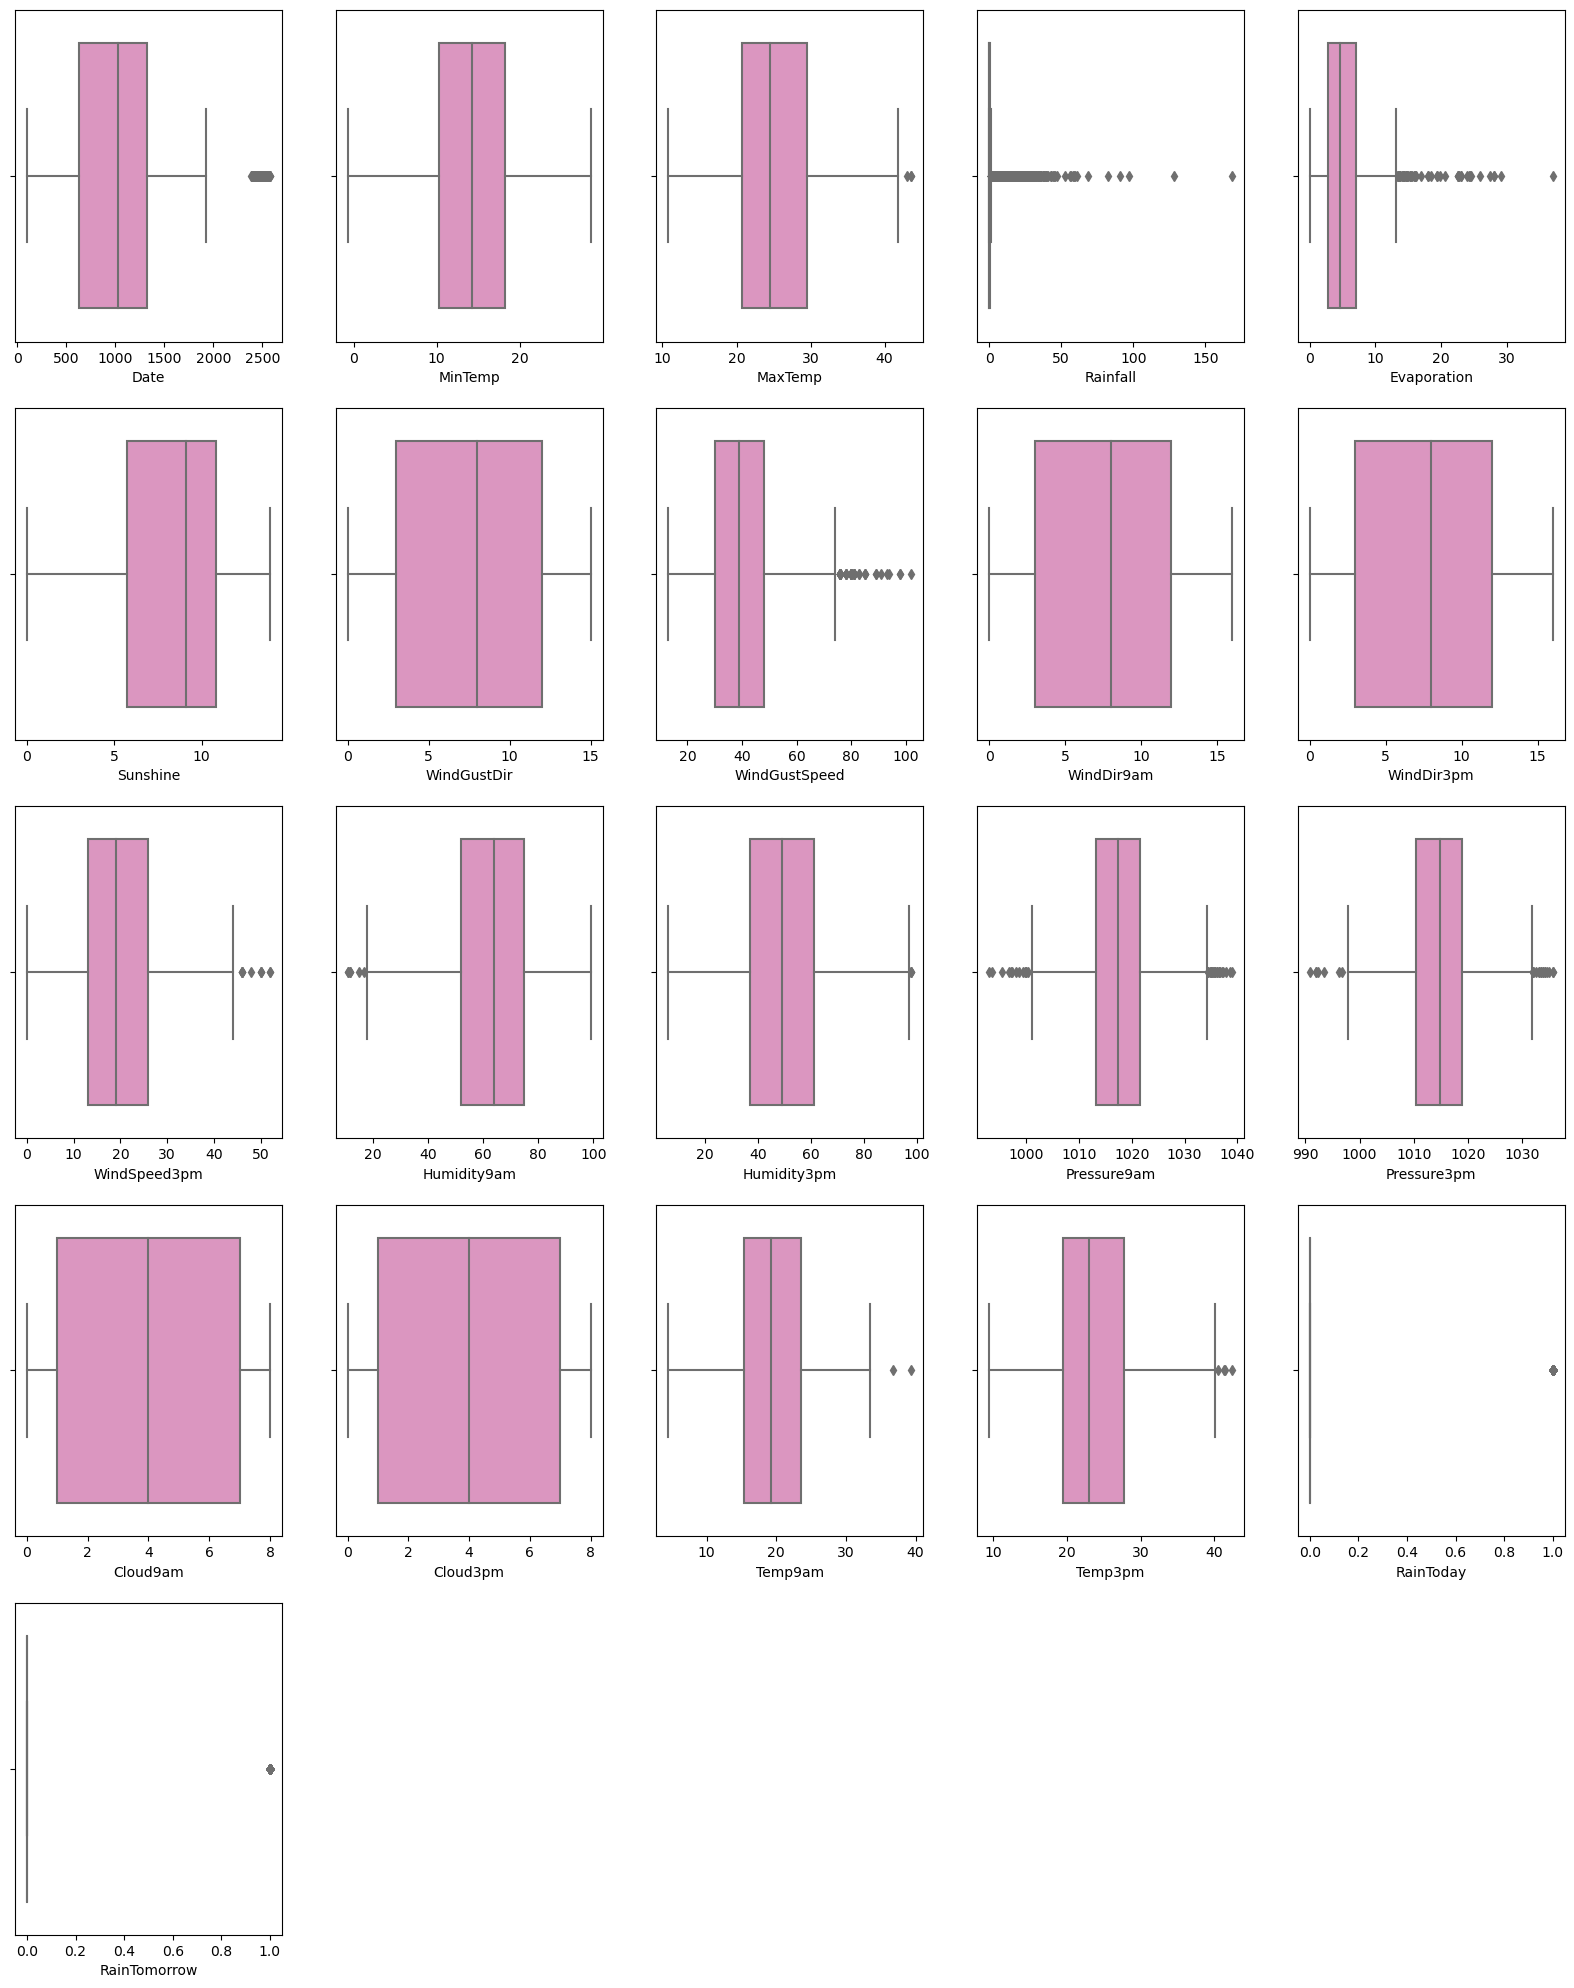

In [256]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df4:
    if p<=23:
        plt.subplot(5,5,p)
        snb.boxplot(df4[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

Lets remove outliers for features with outliers aside categorical features

In [257]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df4[['Evaporation','Date', 'WindGustSpeed','WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(out_features))

z

,Evaporation,Date,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
907,1.000155,1.838733,0.376649,0.302045,1.171458,0.593859,0.231780,0.485434,0.470244,0.409713
908,0.416947,1.836762,0.523527,0.734896,1.290945,2.258640,0.514942,0.834934,0.286047,0.474876
909,0.712177,1.834791,1.551671,1.195759,1.231201,0.871322,0.640791,0.834934,0.286047,0.149540
910,0.594085,1.832821,0.743844,0.071614,0.275305,0.593859,0.231780,0.278910,0.709700,0.479093
911,0.468741,1.830850,0.724933,1.799850,0.215562,1.037800,0.177232,0.324772,0.838638,0.392369
...,...,...,...,...,...,...,...,...,...,...
8381,0.357901,0.736831,0.082894,0.302045,0.155818,0.183039,0.963792,1.103206,1.870141,1.693235
8382,0.232558,0.738801,1.018688,0.734896,0.155818,2.425118,1.105373,1.277956,1.980659,0.270954
8383,0.291604,0.740772,0.229772,0.071614,0.514279,0.316395,1.184029,1.373274,1.851722,1.450407
8384,0.121718,0.742742,0.229772,0.734896,0.083155,0.482873,0.995255,1.262070,1.685944,1.363682


In [258]:
# Using Threshold of 3 to check for outliers

np.where(z>3)

(array([ 228,  565,  569,  576,  579,  583,  586,  590,  595,  598,  601,
         604,  608,  611,  615,  618,  622,  625,  629,  632,  636,  643,
         643,  644,  645,  646,  647,  648,  649,  650,  651,  652,  653,
         656,  656,  658,  676,  692,  694,  733,  734,  743,  744,  763,
         797,  803,  803,  899,  903,  904,  904,  921,  937,  956,  960,
         972,  972,  972,  973,  995, 1002, 1002, 1020, 1131, 1131, 1132,
        1155, 1155, 1169, 1170, 1170, 1170, 1211, 1220, 1774, 1775, 1801,
        1801, 1802, 1819, 1834, 1995, 2019, 2019, 2020, 2020, 2021, 2132,
        2133, 2155, 2155, 2195, 2287, 2372, 2388, 2425, 2453, 2453, 2553,
        2553, 2650, 2682, 2688, 2799, 2800, 2800, 2800, 2959]),
 array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 7, 2, 3, 2, 6, 0, 0, 9, 0, 2,
        2, 6, 7, 2, 7, 6, 7, 3, 7, 2, 2, 3, 6, 7, 2, 3, 6, 7, 3, 6, 7, 6,
        6, 7, 3, 3, 6, 7, 0, 0, 4, 4, 0, 2, 0, 6

In [259]:
df5 = df4[(z<3).all(axis=1)]

df5

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,99,19.8,27.1,24.4,8.6,9.0,2,35.0,12,2,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
908,100,18.7,25.6,6.8,3.8,3.4,0,33.0,12,8,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
909,101,16.5,25.5,16.8,2.8,6.1,15,19.0,15,2,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
910,102,18.5,26.9,0.0,3.2,11.0,1,30.0,12,1,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
911,103,18.2,28.2,0.0,6.8,9.0,5,50.0,6,4,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1406,25.2,34.5,3.0,4.0,9.2,5,39.0,3,5,...,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,1,0
8382,1407,26.2,33.3,0.0,6.0,5.9,3,54.0,1,0,...,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,0,1
8383,1408,24.9,32.8,20.4,6.2,8.7,14,37.0,5,7,...,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,1,0
8384,1409,25.5,33.1,0.0,4.8,7.1,10,37.0,0,15,...,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,0,0


In [260]:
print('the shape of old data: ',df4.shape[0])
print('the shape of new data: ',df5.shape[0])

print('percentage data loss after removing outliers ', ((df4.shape[0] - df5.shape[0])/df4.shape[0])* 100)

the shape of old data:  3200
the shape of new data:  3111
percentage data loss after removing outliers  2.78125


Data loss is negligible

<function matplotlib.pyplot.show(close=None, block=None)>

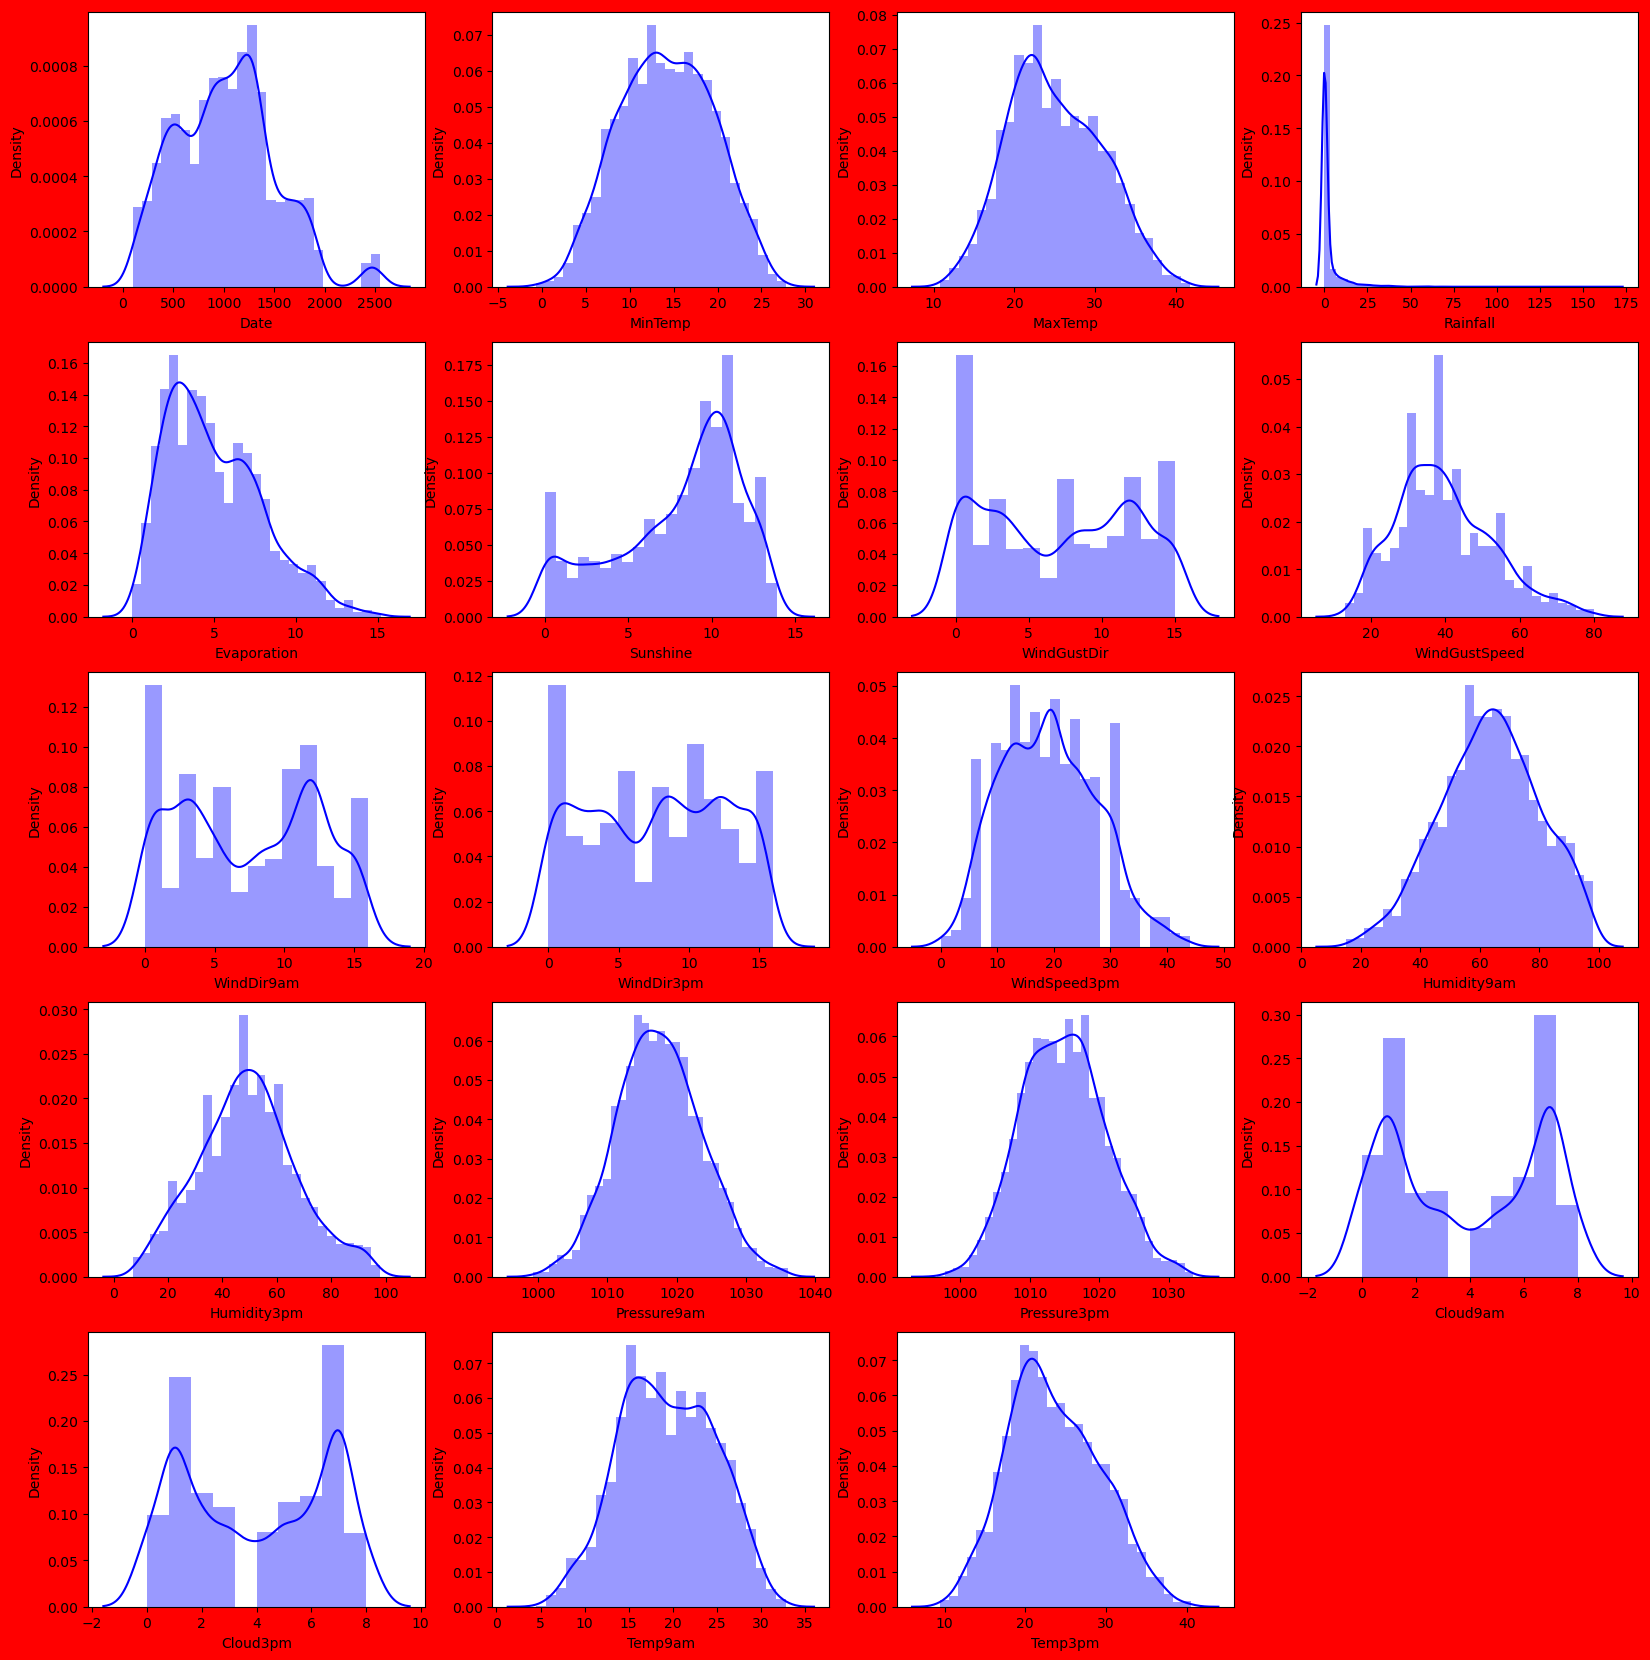

In [261]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df5:
    if p<= 19:
        ax = plt.subplot(6,4,p)
        snb.distplot(df5[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [262]:
df5.skew()

Date             0.387192
MinTemp         -0.008442
MaxTemp          0.225361
Rainfall         7.931577
Evaporation      0.677501
Sunshine        -0.697037
WindGustDir      0.024808
WindGustSpeed    0.535415
WindDir9am       0.020357
WindDir3pm      -0.046605
WindSpeed3pm     0.255332
Humidity9am     -0.140643
Humidity3pm      0.193820
Pressure9am      0.109594
Pressure3pm      0.165249
Cloud9am        -0.001767
Cloud3pm        -0.038918
Temp9am         -0.006324
Temp3pm          0.240515
RainToday        1.280622
RainTomorrow     1.313276
dtype: float64

In [263]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column aside the label
pt = PowerTransformer(method='yeo-johnson')

for col in df5:
    if col != 'Rainfall':
        if (df5[col].skew() < -0.5) or (df5[col].skew() > 0.5):
            df5[col] = pt.fit_transform(df5[col].values.reshape(-1, 1))        
df5.skew()

Date             0.387192
MinTemp         -0.008442
MaxTemp          0.225361
Rainfall         7.931577
Evaporation     -0.030929
Sunshine        -0.418632
WindGustDir      0.024808
WindGustSpeed   -0.011829
WindDir9am       0.020357
WindDir3pm      -0.046605
WindSpeed3pm     0.255332
Humidity9am     -0.140643
Humidity3pm      0.193820
Pressure9am      0.109594
Pressure3pm      0.165249
Cloud9am        -0.001767
Cloud3pm        -0.038918
Temp9am         -0.006324
Temp3pm          0.240515
RainToday        1.280622
RainTomorrow     1.313276
dtype: float64

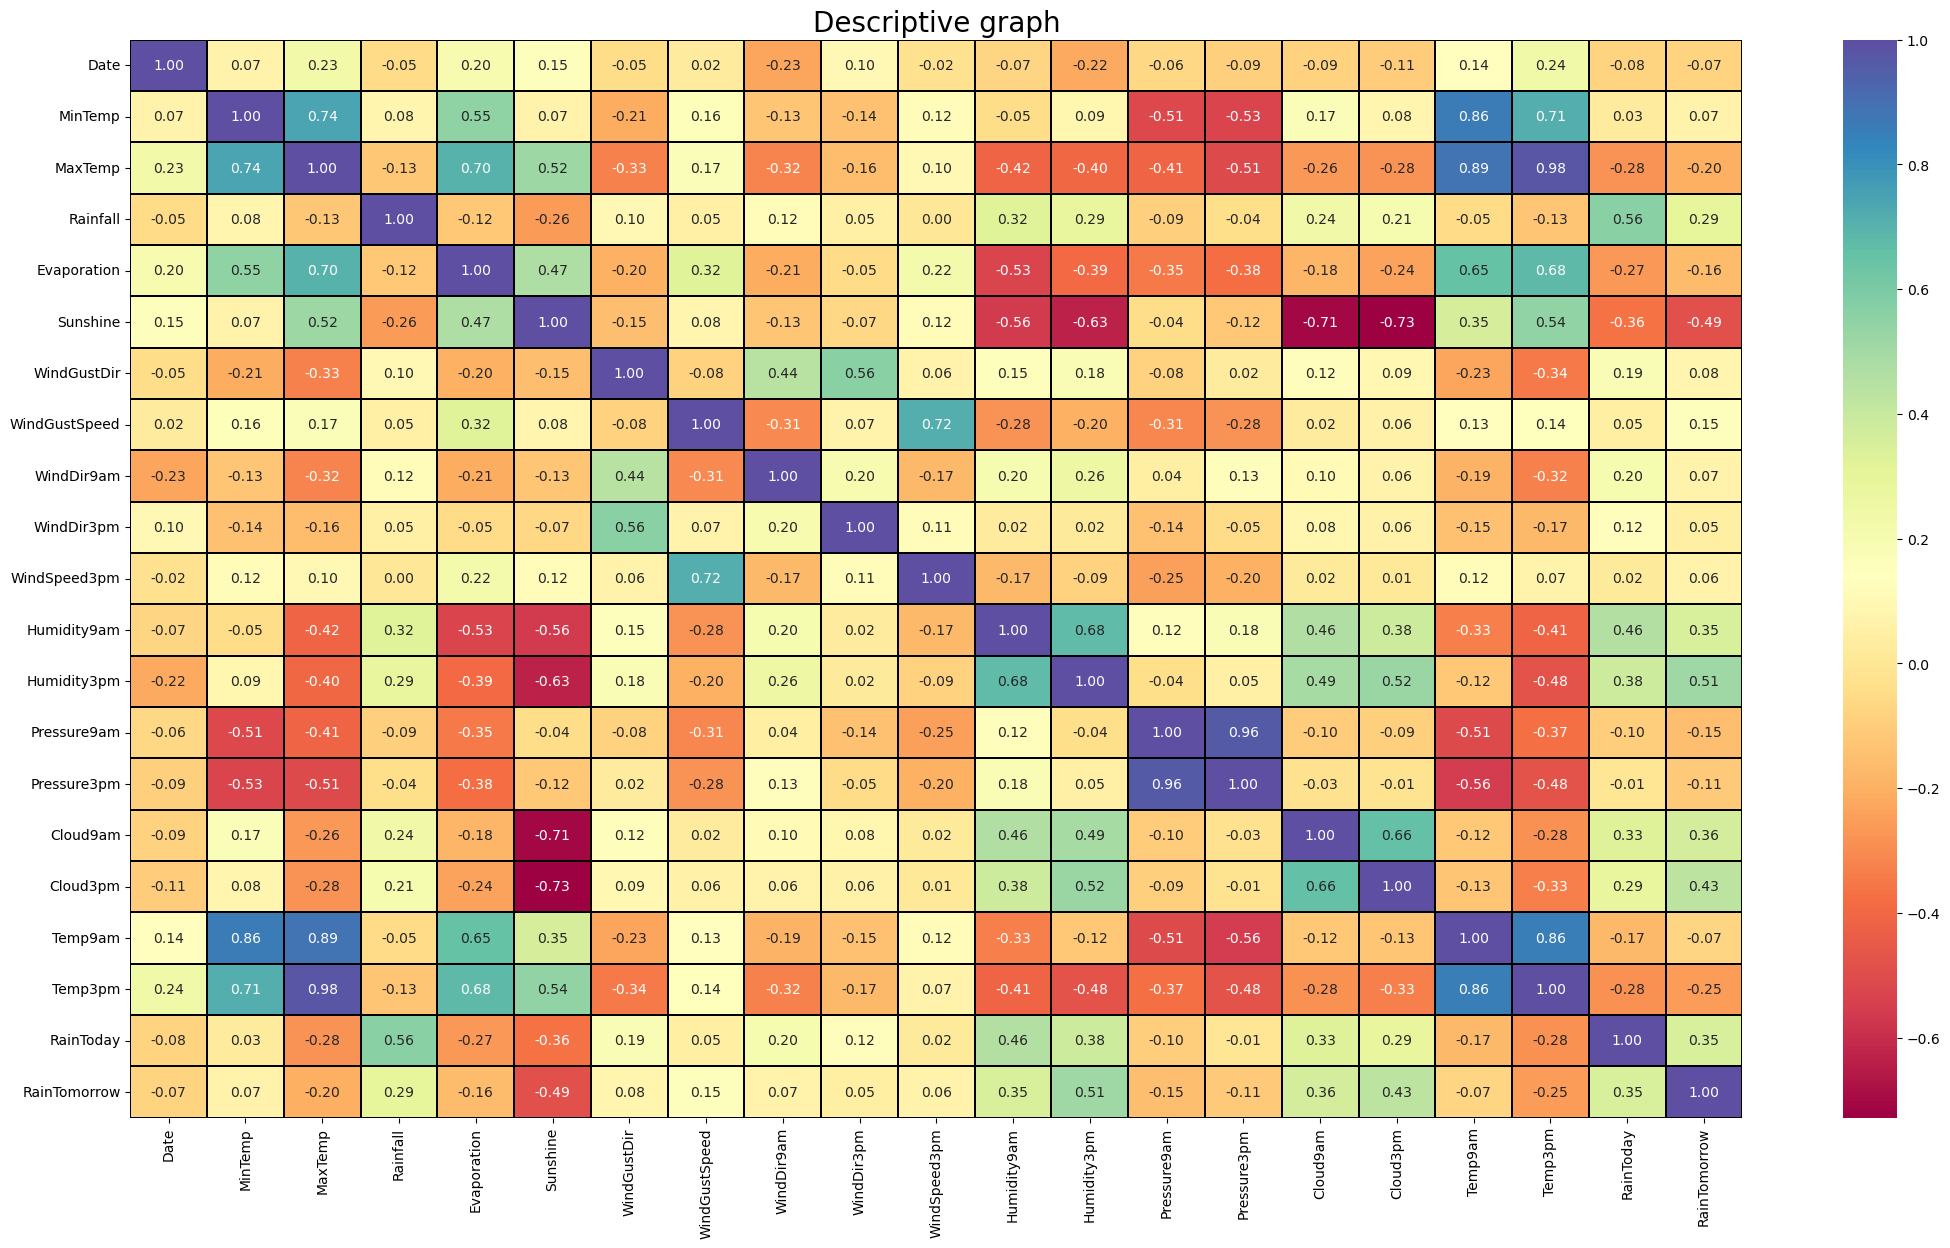

In [264]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df5.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

There is multicolinearity between MaxTemp, Temp9am and Temp3pm, Pressure9am and Pressure3pm.

MaxTemp, Temp9am,Pressure3pm columns will be droped because they are contributing less to the label compared to Temp3pm and Pressure9am 



In [265]:
# Droping relationship because it as coefficient of -0.35 while Capital_gain has -0.36

df5.drop(columns=['Temp9am','MaxTemp','Pressure3pm'], inplace=True)

df5

,Date,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
907,99,19.8,24.4,1.181033,0.190760,2,-0.259041,12,2,22.0,83.0,60.0,1018.9,6.0,6.0,26.0,1.827269,1.852464
908,100,18.7,6.8,-0.278701,-1.295381,0,-0.428925,12,8,13.0,85.0,90.0,1020.7,4.0,7.0,20.9,1.827269,1.852464
909,101,16.5,16.8,-0.705426,-0.633837,15,-1.872549,15,2,9.0,84.0,65.0,1021.5,5.0,7.0,24.5,1.827269,-0.539821
910,102,18.5,0.0,-0.526311,0.815922,1,-0.697297,12,1,20.0,68.0,60.0,1018.9,2.0,5.0,26.4,-0.547265,-0.539821
911,103,18.2,0.0,0.711104,0.190760,5,0.842627,6,4,35.0,67.0,68.0,1016.3,1.0,1.0,25.9,-0.547265,1.852464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,1406,25.2,3.0,-0.200979,0.251338,5,0.061965,3,5,22.0,66.0,46.0,1011.3,7.0,7.0,33.4,1.827269,-0.539821
8382,1407,26.2,0.0,0.477687,-0.686681,3,1.097261,1,0,13.0,66.0,93.0,1010.4,4.0,8.0,25.2,-0.547265,1.852464
8383,1408,24.9,20.4,0.537715,0.100737,14,-0.095599,5,7,20.0,72.0,55.0,1009.9,4.0,6.0,32.0,1.827269,-0.539821
8384,1409,25.5,0.0,0.089859,-0.361440,10,-0.095599,0,15,13.0,62.0,58.0,1011.1,7.0,7.0,31.5,-0.547265,-0.539821


In [266]:
#Seperate the label from feature

x = df5.drop('Rainfall', axis =1)
y = df5['Rainfall']

In [267]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

x

,Date,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,-1.882891,1.057853,1.181033,0.190760,-1.025059,-0.259041,0.923552,-1.169165,0.337784,1.181340,0.596304,0.229415,0.751919,0.744869,0.418492,1.827269,1.852464
1,-1.880848,0.850311,-0.278701,-1.295381,-1.424803,-0.428925,0.923552,0.072013,-0.725108,1.301981,2.266113,0.521852,0.034147,1.121725,-0.476534,1.827269,1.852464
2,-1.878805,0.435226,-0.705426,-0.633837,1.573278,-1.872549,1.534042,-1.169165,-1.197505,1.241660,0.874605,0.651825,0.393033,1.121725,0.155249,1.827269,-0.539821
3,-1.876761,0.812576,-0.526311,0.815922,-1.224931,-0.697297,0.923552,-1.376028,0.101586,0.276532,0.596304,0.229415,-0.683626,0.368013,0.488691,-0.547265,-0.539821
4,-1.874718,0.755973,0.711104,0.190760,-0.425443,0.842627,-0.297428,-0.755439,1.873073,0.216212,1.041586,-0.192995,-1.042512,-1.139411,0.400943,-0.547265,1.852464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,0.787843,2.076698,-0.200979,0.251338,-0.425443,0.061965,-0.907918,-0.548576,0.337784,0.155891,-0.182940,-1.005321,1.110806,1.121725,1.717158,1.827269,-0.539821
3107,0.789887,2.265373,0.477687,-0.686681,-0.825187,1.097261,-1.314912,-1.582891,-0.725108,0.155891,2.433094,-1.151540,0.034147,1.498581,0.278096,-0.547265,1.852464
3108,0.791930,2.020095,0.537715,0.100737,1.373406,-0.095599,-0.500925,-0.134850,0.101586,0.517814,0.318003,-1.232772,0.034147,0.744869,1.471464,1.827269,-0.539821
3109,0.793974,2.133300,0.089859,-0.361440,0.573918,-0.095599,-1.518408,1.520054,-0.725108,-0.085391,0.484983,-1.037814,1.110806,1.121725,1.383717,-0.547265,-0.539821


In [268]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.197998,Date
1,5.852268,MinTemp
2,2.712360,Evaporation
3,4.278149,Sunshine
4,1.906808,WindGustDir
5,2.873716,WindGustSpeed
6,1.575871,WindDir9am
7,1.568188,WindDir3pm
8,2.253082,WindSpeed3pm
9,2.695601,Humidity9am


In [269]:
df5.drop('MinTemp', axis=1,inplace=True)


They are within acceptable threshold of not more than 5

In [271]:
#For linear regrassion problem, I will be import regression algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.4649349628684153  at random state :  106


In [272]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [273]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.4649349628684153
R2 Score on training data :  31.24865450086802
mean absolute error :  2.245128102419741
mean squared error :  20.194910537177705
root mean squared error :  4.4938747798729


In [274]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.30665500271962076
R2 Score on training data :  52.10515938242612
mean absolute error :  1.7758458244111348
mean squared error :  26.16885653104925
root mean squared error :  5.1155504621740615


In [275]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.394805901075325
R2 Score on training data :  77.88395626498512
mean absolute error :  1.897864689193171
mean squared error :  22.84178527330325
root mean squared error :  4.779308032895897


In [276]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  0.43900574917884383
R2 Score on training data :  27.806742690161222
mean absolute error :  1.9455046406257281
mean squared error :  21.173554467208
root mean squared error :  4.6014730757886655


In [277]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.46496194684536585
R2 Score on training data :  31.248638607526324
mean absolute error :  2.2446326552836537
mean squared error :  20.193892083414823
root mean squared error :  4.493761462674096


In [278]:
dtr =DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_dtr))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_dtr))
print('mean squared error : ',mean_squared_error(y_test, pred_dtr))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_dtr))) 

R2 Score :  -0.1719478356034687
R2 Score on training data :  100.0
mean absolute error :  2.205139186295503
mean squared error :  44.23271948608137
root mean squared error :  6.650768338025418


In [279]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_LR) - score.mean())

[0.29490585 0.26460194 0.28915716 0.47438626 0.39636022]
0.3438822861969403
Difference between R2 score and cross validation score is  0.12105267667147501


In [280]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_ridge) - score.mean())

[0.29487797 0.26461611 0.28914372 0.47459395 0.39633786]
0.34391392219821715
Difference between R2 score and cross validation score is  0.1210480246471487


I will go for ridge and apply hyperparameter tunning to improve performance

In [281]:
# The best choice is ridge

# The model with the least dif the best choice
# Hyper parameter tuning to get best parameter for my model
#Build model for best performing option

from sklearn.model_selection import GridSearchCV

param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True, False], 'solver' :['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
             'positive' : [False,True],
             'random_state' : [1,4,10,20]}

gscv = GridSearchCV(ridge, param, cv=5)

gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [282]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [283]:
model= Ridge(alpha=2,fit_intercept=True, positive=True, random_state=1,solver='auto')

In [284]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score :  0.4652737928065541
mean absolute error :  2.21487843370033
mean squared error :  20.182122109952648
root mean squared error :  4.492451681426596


No significant improvement but will stick to the model for now

In [285]:
# Save model

import joblib
import pickle

filename = 'rainfall.pkl'
pickle.dump(model,open(filename, 'wb'))

In [286]:
loaded_model = pickle.load(open('rainfall.pkl','rb'))

result = loaded_model.score(x_test, y_test)
print(result * 100)

46.52737928065541


In [287]:
#checking the value of original and predicted minimum temperature 
con = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])

con

,0,1,2,3,4,5,6,7,8,9,...,924,925,926,927,928,929,930,931,932,933
Predicted,-1.842489,-1.084544,-0.200296,11.537529,-0.742529,-0.069751,12.062539,12.200292,1.334752,0.148947,...,0.170357,-1.080495,-0.647701,9.82486,0.816277,10.236098,11.974146,9.514687,12.112834,8.582157
Original,0.000000,0.000000,0.000000,2.200000,0.000000,0.000000,4.400000,3.600000,0.000000,0.200000,...,0.600000,0.000000,0.000000,3.40000,0.000000,3.600000,20.600000,4.600000,3.000000,2.200000
